# Анализ показателей YouTube-канала Nat Geo WILD
![](https://yt3.googleusercontent.com/Cyj_vFn-diYInY0Ib2pfWsZphMi0h5DTfSoQWKtyUhfndXzv_6kfbbKR67OagtyHlkI8NYId=w2560-fcrop64=1,00005a57ffffa5a8-k-c0xffffffff-no-nd-rj)

[Nat Geo WILD](https://www.youtube.com/NatGeoWild) - это популярный YouTube-канал, на котором публикуются документальные фильмы и сериалы о животном мире и природе.

В рамках проекта будут рассмотрены данные о полных выпусках (более 20 минут) за период май 2022 - сентябрь 2023 года. 

**Проблема**:

Пользовательская активность в 2023 году снизилась: упали просмотры, лайки и комментарии. Необходимо разобраться в причинах снижения показателей. 

**Цели проекта**:

1. Сравнить статистику канала за 2 года в разрезе месяцов, серий и выпусков.

2. Определить высокорейтинговые и низкорейтинговые серии.

3. Проверить гипотезы о снижении пользовательской активности в 2023 году.

**План проекта**:

1. [Обзор и предобработка данных](#section2)

2. [Анализ данных](#section3)

3. [Проверка гипотез](#section4)

4. [Общие выводы](#section5)

5. [Рекомендации](#section6)

<a id='section2'></a>
# Обзор и предобработка данных  
## Импорт библиотек

In [1]:
import pandas as pd
import datetime as dt                               # для работы с датой 
import seaborn as sns                               # для визуализации данных
from matplotlib import pyplot as plt                # для визуализации данных
%matplotlib inline

import warnings                                     # для предупреждений в программе 
warnings.filterwarnings('ignore')                   # игнорировать предупреждения

# с помощью pd.option настроим вывод так чтобы
pd.options.display.max_columns = None               # чтобы не обрезались колонки
pd.options.display.max_rows = None                  # чтобы видеть все содержимое вывода
pd.options.display.max_colwidth = -1                # текст в ячейке отражался полностью вне зависимости от длины;
pd.options.display.float_format = '{:.2f}'.format   # все числа отражались с двумя знаками после запятой.

In [2]:
data = pd.read_csv('downloads/Nat_Geo_WILD_data_file/data.csv',sep=';')

In [3]:
def info_df(dataframe):
    print("5 первых строк таблицы:")
    display(dataframe.head())
    print("Статистика данных:")
    display(dataframe.describe().T)
    display(dataframe.describe(include='object').T)
    print("Общая информация о данных:")
    dataframe.info()
    
info_df(data)

5 первых строк таблицы:


,title,likes,views,comments,duration,created_at,observation_date
0,Shark Attack: California Coast Carnage (Full Episode) | When Sharks Attack,463,17010,26,44:25,07-09-2023,09-09-2023
1,In the Operating Room: A White Bengal Tiger Emergency (Full Episode) | Animal ER,427,13824,18,44:36,31-08-2023,09-09-2023
2,The Vet Detective and the Amputee Alligator (Full Episode) | The Wild Life of Dr. Ole,485,20340,16,44:24,24-08-2023,09-09-2023
3,"Tortoise Surgery, Chinchilla Emergency, and the Chicken (Full Episode) | Dr. K's Exotic Animal ER",462,20611,15,44:24,17-08-2023,09-09-2023
4,Salmon Slaughterhouse: Black Bear Survival (Full Episode) | Alaska's Grizzly Gauntlet,662,31088,27,44:24,14-08-2023,09-09-2023


Статистика данных:


,count,mean,std,min,25%,50%,75%,max
likes,100.00,7099.97,13937.68,174.00,597.75,1750.00,5025.00,79000.00
views,100.00,1030913.53,2370997.79,8879.00,33069.50,88919.50,629260.00,13260600.00
comments,100.00,203.02,380.80,5.00,20.00,53.00,244.75,2779.00


,count,unique,top,freq
title,100,100,Shark Attack: California Coast Carnage (Full Episode) | When Sharks Attack,1
duration,100,20,44:24,49
created_at,100,100,07-09-2023,1
observation_date,100,1,09-09-2023,100


Общая информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   title             100 non-null    object
 1   likes             100 non-null    int64 
 2   views             100 non-null    int64 
 3   comments          100 non-null    int64 
 4   duration          100 non-null    object
 5   created_at        100 non-null    object
 6   observation_date  100 non-null    object
dtypes: int64(3), object(4)
memory usage: 5.6+ KB


## Описание данных

`title` - название видео в формате *эпизод | серия*;

`likes` - количество лайков под видео  на момент сбора данных;

`views` - количество просмотров видео на момент сбора данных;

`comments` - количество комментариев под видео на момент сбора данных;

`duration` - длительность видео в формате *мин:сек*;

`created_at` - дата публикации видео в формате *день-месяц-год*;

`observation_date` - дата выгрузки данных в формате *день-месяц-год*.


## Изменение типа данных
Исправим тип данных в столбцах `created_at` и `observation_date` на *datetime*

In [4]:
data['observation_date'] = pd.to_datetime(data['observation_date'])
data['created_at'] = data['created_at'].map(lambda x: dt.datetime.strptime(x, '%d-%m-%Y'))

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   title             100 non-null    object        
 1   likes             100 non-null    int64         
 2   views             100 non-null    int64         
 3   comments          100 non-null    int64         
 4   duration          100 non-null    object        
 5   created_at        100 non-null    datetime64[ns]
 6   observation_date  100 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(2)
memory usage: 5.6+ KB


## Создание колонки `month` и `year`
`month`- месяц публикации видео;

`year` - год публикации видео.

In [5]:
data['month'] = data['created_at'].dt.month
data['year'] = data['created_at'].dt.year

data.head(3)

,title,likes,views,comments,duration,created_at,observation_date,month,year
0,Shark Attack: California Coast Carnage (Full Episode) | When Sharks Attack,463,17010,26,44:25,2023-09-07,2023-09-09,9,2023
1,In the Operating Room: A White Bengal Tiger Emergency (Full Episode) | Animal ER,427,13824,18,44:36,2023-08-31,2023-09-09,8,2023
2,The Vet Detective and the Amputee Alligator (Full Episode) | The Wild Life of Dr. Ole,485,20340,16,44:24,2023-08-24,2023-09-09,8,2023


## Временное распределение данных
Посмотрим, в каком временном интервале находятся данные

In [6]:
print('Минимальная дата публикации:', data['created_at'].min())
print('Максимальная дата публикации:', data['created_at'].max())

Минимальная дата публикации: 2022-05-02 00:00:00
Максимальная дата публикации: 2023-09-07 00:00:00


В датесете имеются данные за первую неделю сентября 2023 года, этого недостаточно для включения сентября в анализ, поэтому исключим его из выборки

In [7]:
print('Число строк до обработки:', data.shape[0])

data = data.query('not (month == 9 and year == 2023)')
data = data.reset_index(drop = True)

print('Число строк после обработки:',data.shape[0])

Число строк до обработки: 100
Число строк после обработки: 99


Посмотрим, сколько выпусков вышло в 2022 и 2023 году

In [8]:
data.groupby('year', as_index = False).agg({'title':'nunique'})

,year,title
0,2022,66
1,2023,33


 В 2022 году вышло 66 выпусков, в 2023 - 33.

## Создание колонки `series`

Создадим колонку `series`, в которой будет отображена серия выпусков.

Для начала создадим список  `chapter` с уникальными названиями фильмов и пустой список `empty`

In [9]:
chapter = list(data['title'].unique())
empty = []

chapter[:5]

['In the Operating Room: A White Bengal Tiger Emergency (Full Episode) | Animal ER',
 'The Vet Detective and the Amputee Alligator (Full Episode) | The Wild Life of Dr. Ole',
 "Tortoise Surgery, Chinchilla Emergency, and the Chicken (Full Episode) | Dr. K's Exotic Animal ER",
 "Salmon Slaughterhouse: Black Bear Survival (Full Episode) | Alaska's Grizzly Gauntlet",
 'A Fungus Among Us (Full Episode) | Pop Goes the Vet with Dr. Joya']

Видно, что большинство данных можно разделить по наличию ` (Full Episode) | ` в названии.

Однако такие выпуски, как `'Man V. Lion | Full Episode'` и `'Jaguar vs. Croc | Full Episode'`, нужно обработать отдельно.

Добавим в пустой список `empty` название серий

In [10]:
for i in chapter:
    if ' (Full Episode) | ' in i :
        empty += (i.split(' (Full Episode) | '))
    else:
        empty += reversed(i.split(' | '))
        
empty[:5]

['In the Operating Room: A White Bengal Tiger Emergency',
 'Animal ER',
 'The Vet Detective and the Amputee Alligator',
 'The Wild Life of Dr. Ole',
 'Tortoise Surgery, Chinchilla Emergency, and the Chicken']

Создадим колонку `series`. А также заменим названия серий `'Man V. Lion'` и `'Jaguar vs. Croc'` на `'Battle'`

In [11]:
data['series'] = pd.Series(empty[1::2])
data.loc[(data['series'] == 'Man V. Lion')|(data['series'] == 'Jaguar vs. Croc'), 'series'] = 'Battle'

data.head(3)

,title,likes,views,comments,duration,created_at,observation_date,month,year,series
0,In the Operating Room: A White Bengal Tiger Emergency (Full Episode) | Animal ER,427,13824,18,44:36,2023-08-31,2023-09-09,8,2023,Animal ER
1,The Vet Detective and the Amputee Alligator (Full Episode) | The Wild Life of Dr. Ole,485,20340,16,44:24,2023-08-24,2023-09-09,8,2023,The Wild Life of Dr. Ole
2,"Tortoise Surgery, Chinchilla Emergency, and the Chicken (Full Episode) | Dr. K's Exotic Animal ER",462,20611,15,44:24,2023-08-17,2023-09-09,8,2023,Dr. K's Exotic Animal ER


## Создание колонки `days_online`

Колонка `days_online` показывает сколько дней видео находится на канале к моменту сбора данных

In [12]:
data['days_online'] = (data['observation_date'] - data['created_at']).dt.days 

data.head(3)

,title,likes,views,comments,duration,created_at,observation_date,month,year,series,days_online
0,In the Operating Room: A White Bengal Tiger Emergency (Full Episode) | Animal ER,427,13824,18,44:36,2023-08-31,2023-09-09,8,2023,Animal ER,9
1,The Vet Detective and the Amputee Alligator (Full Episode) | The Wild Life of Dr. Ole,485,20340,16,44:24,2023-08-24,2023-09-09,8,2023,The Wild Life of Dr. Ole,16
2,"Tortoise Surgery, Chinchilla Emergency, and the Chicken (Full Episode) | Dr. K's Exotic Animal ER",462,20611,15,44:24,2023-08-17,2023-09-09,8,2023,Dr. K's Exotic Animal ER,23


## Обработка пропусков

In [13]:
display('Количество пропусков в датафреме data', data.isna().sum())

'Количество пропусков в датафреме data'

title               0
likes               0
views               0
comments            0
duration            0
created_at          0
observation_date    0
month               0
year                0
series              0
days_online         0
dtype: int64

## Обработка дубликатов

In [14]:
print('Явных дубликатов в датафреме data:', data.duplicated().sum())

Явных дубликатов в датафреме data: 0


## Обработка неявных дубликатов

In [15]:
print(data['series'].sort_values().unique())

["Alaska's Grizzly Gauntlet" 'America the Wild' 'Animal ER'
 'Animal Fight Night' 'Bandit Patrol' 'Battle'
 'Cesar Millan: Better Human Better Dog'
 'Cesar Millan: Better Human, Better Dog' 'Critter Fixers'
 "Dr. K's Exotic Animal ER" 'Dr. Oakley, Yukon Vet'
 "Everything You Didn't Know About Animals"
 'Fish My City with Mike Iaconelli' 'Florida Untamed'
 'Heartland Docs, DVM' 'Jungle Animal Rescue' 'Man v. Animal'
 'Pop Goes the Vet with Dr. Joya' 'Predator Fail' 'Savage Kingdom'
 'Secrets of the Zoo' 'Secrets of the Zoo: North Carolina'
 'The Incredible Dr. Pol' 'The Wild Life of Dr. Ole' 'Trackers'
 "World's Deadliest"]


Приведем названия серий к одному типу :
+ `'Cesar Millan: Better Human Better Dog'`, `'Cesar Millan: Better Human, Better Dog'` 

+ `'Secrets of the Zoo: North Carolina'`,`'Secrets of the Zoo'`
 
+ `'Dr. K's Exotic Animal ER'`, `'Animal ER'`

In [16]:
print('Число серий до обработки:',data['series'].nunique())

data.loc[(data['series'] == 'Cesar Millan: Better Human Better Dog'), 'series'] = 'Cesar Millan: Better Human, Better Dog'
data.loc[(data['series'] == 'Secrets of the Zoo: North Carolina'), 'series'] = 'Secrets of the Zoo'
data.loc[(data['series'] == "Dr. K's Exotic Animal ER"), 'series'] = 'Animal ER'

print('Число серий после обработки:',data['series'].nunique())

Число серий до обработки: 26
Число серий после обработки: 23


## Выводы
+ В датафрейме`data` собрана информация о 99 видео за период май 2022 - август 2023. В 2022 году было опубликовано 66 выпусков, в 2023 - 33. За 2 года вышло 23 серии видео. Удалены данные за первую неделю сентября 2023. 
+ Пропусков и дубликатов **не обнаружено**; неявные дубликаты **устранены**.
+ Изменен тип данных в колонках `created_at` и `observation_date` на *datetime*.
+ Добавлены колонки `month`, `year`, `series`, `days_online`.


Данные **готовы** для анализа.

<a id='section3'></a>
# Анализ данных

## Временная статистика по месяцам

Посмотрим показатели эпизодов по месяцам за 2022 и 2023 год

### Статистика числа  выпусков

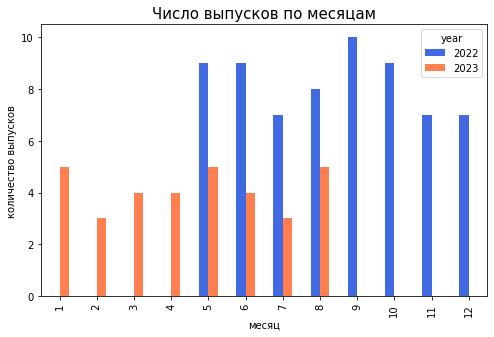

In [17]:
videos_per_month = data.pivot_table(index = 'month', columns = 'year', values = 'title', aggfunc = 'nunique')

videos_per_month.plot(kind='bar', figsize = (8,5), color = ('royalblue', 'coral'))
plt.title('Число выпусков по месяцам', size = 15)
plt.xlabel('месяц', size = 10)
plt.ylabel('количество выпусков', size = 10)
plt.show()

In [18]:
videos_per_month_upd = videos_per_month.reset_index()  
videos_per_month_upd.columns = ['month','2022','2023']

print ('Среднее число выпусков за месяц в 2022 году:',
                               round(videos_per_month_upd['2022'].sum()/videos_per_month_upd['2022']\
                                                                                             .notnull().sum()))
print ('Среднее число выпусков за месяц в 2023 году:',
                               round(videos_per_month_upd['2023'].sum()/videos_per_month_upd['2022']\
                                                                                             .notnull().sum()))

Среднее число выпусков за месяц в 2022 году: 8
Среднее число выпусков за месяц в 2023 году: 4


В 2022 году в среднем выходило по 8 видео в месяц, за 2023 год показатели в 2 раза ниже.

### Статистика просмотров
Посмотрим среднее* количество просмотров за каждый месяц. 

*Смотрим среднее, а не медиану, чтобы учесть популярные выпуски.

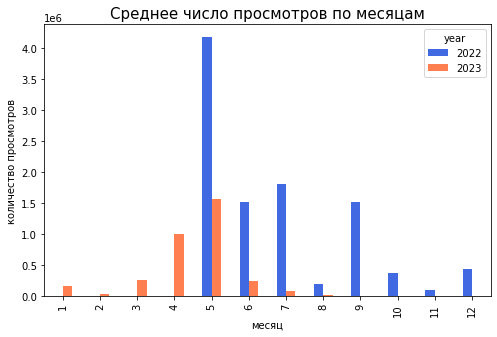

In [19]:
views_per_month = data.pivot_table(index = 'month', columns = 'year', values = 'views', aggfunc = 'mean')

views_per_month.plot(kind = 'bar', figsize = (8,5), color = ('royalblue','coral'))
plt.title('Среднее число просмотров по месяцам', size = 15)
plt.xlabel('месяц', size = 10)
plt.ylabel('количество просмотров', size = 10)
plt.show()

+ Бум просмотров под видео, опубликованных в мае 2022, вероятно, связан с появлением на канале полноценных выпусков (20+ мин): ранее размещались лишь короткие ролики (~5 мин). Высокие просмотры также были у июньских, июльских и сентябрьских выпусков.
+ В 2023 больше всего просмотров под видео, опубликованных в марте, апреле, мае и июне.

In [20]:
print('Среднее число просмотров под видео за 2022 год:',round(data.query('year == 2022')['views'].mean()/1000000,2),'млн.')
print('Среднее число просмотров под видео за 2023 год:',round(data.query('year == 2023')['views'].mean()/1000000,2),'млн.')

Среднее число просмотров под видео за 2022 год: 1.33 млн.
Среднее число просмотров под видео за 2023 год: 0.46 млн.


### Статистика лайков
Посмотрим cреднее количество лайков за каждый месяц

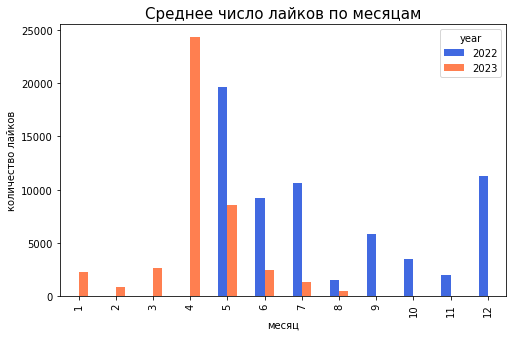

In [21]:
likes_per_month = data.pivot_table(index = 'month', columns = 'year', values = 'likes', aggfunc = 'mean')

likes_per_month.plot(kind = 'bar', figsize = (8,5), color = ('royalblue', 'coral'))
plt.title('Среднее число лайков по месяцам', size = 15)
plt.xlabel('месяц', size = 10)
plt.ylabel('количество лайков', size = 10)
plt.show()

+ В 2022 больше всего лайков получили видео, опубликованные в мае, июле и декабре.
+ В 2023 больше всего лайков получили видео, опубликованные в апреле, мае и июне. Апрельские выпуски получили рекордное количество лайков за 2 года.

In [22]:
print('Среднее число лайков под видео за 2022 год:',round(data.query('year == 2022')['likes'].mean()))
print('Среднее число лайков под видео за 2023 год:',round(data.query('year == 2023')['likes'].mean()))

Среднее число лайков под видео за 2022 год: 8014
Среднее число лайков под видео за 2023 год: 5473


### Статистика комментариев
Посмотрим cреднее количество комментариев за каждый месяц

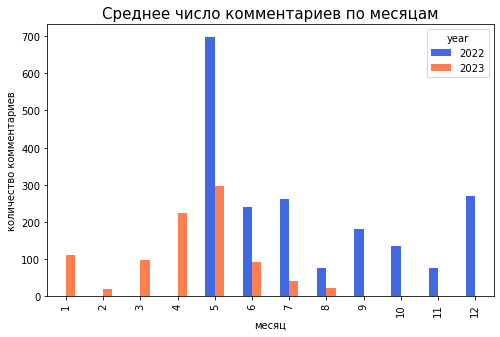

In [23]:
comments_per_month = data.pivot_table(index = 'month', columns = 'year', values = 'comments', aggfunc = 'mean')

comments_per_month.plot(kind = 'bar', figsize = (8,5), color = ('royalblue','coral'))
plt.title('Среднее число комментариев по месяцам', size = 15)
plt.xlabel('месяц', size = 10)
plt.ylabel('количество комментариев', size = 10)
plt.show()

+ В 2022 больше всего комментировали выпуски, вышедшие в мае, июле и декабре. Майские выпуски получили рекордное количество комментариев за 2 года.
+ В 2023 больше всего комментировали выпуски, вышедшие в апреле, мае и июне.

In [24]:
print('Среднее число комментариев под видео за 2022 год:',round(data.query('year == 2022')['comments'].mean()))
print('Среднее число комментариев под видео за 2023 год:',round(data.query('year == 2023')['comments'].mean()))

Среднее число комментариев под видео за 2022 год: 247
Среднее число комментариев под видео за 2023 год: 121


### Выводы
+ В 2022 году в среднем выходило по 8 **видео в месяц**, за 2023 год показатели **в 2 раза ниже**.
+ В 2022 году среднее **число просмотров под видео** составило 1.33 млн., за 2023 год показатели **в 2.9 раза ниже**.
+ В 2022 году среднее **число лайков под видео** составило 8014, в 2023 показатели **в 1.5 раза ниже**.
+ В 2022 году среднее **число комментариев под видео** составило 247, за 2023 год показатели **в 2 раза ниже**.

**Сформулируем гипотезы**: 

+ **H1**: Пользовательская активность в 2023 году ниже, т.к. доля рейтинговых выпусков в 2022 была выше.

+ **H2**: Пользовательская активность в 2023 году ниже, т.к. выпуски 2022 года находились в сети дольше.

## Вовлеченность аудитории (ERV)
Коэффициент вовлеченности *ERV (Engagement Rate Value)* - это показатель, используемый для оценки уровня вовлеченности аудитории в контент на платформе YouTube или в других социальных медиа. 

*ERV* измеряет, насколько активно зрители взаимодействуют с контентом, выражая свой интерес через комментарии, лайки и другие формы взаимодействия.

$
\text{ERV} = {\text{Количество взаимодействий}\over \text{Количество просмотров}} * \text{100%}
$


### Вовлеченность по лайкам

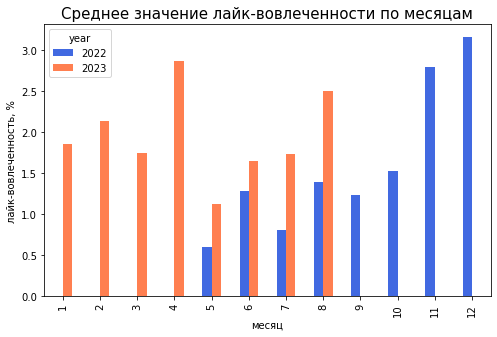

In [25]:
data['likes_to_views_ratio'] = 100*data['likes']/data['views'] 

likes_to_views_ratio = data.pivot_table(index = 'month', columns = 'year', values = 'likes_to_views_ratio', aggfunc = 'mean')
likes_to_views_ratio.plot(kind = 'bar', figsize = (8,5), color = ('royalblue','coral'))

plt.title('Среднее значение лайк-вовлеченности по месяцам', size = 15)
plt.xlabel('месяц', size = 10)
plt.ylabel('лайк-вовлеченность, %', size = 10)
plt.show()

In [26]:
print('Средняя вовлеченность по лайкам за 2022 год:',round(data.query('year==2022')['likes_to_views_ratio'].mean(),2),'%')
print('Средняя вовлеченность по лайкам за 2023 год:',round(data.query('year==2023')['likes_to_views_ratio'].mean(),2),'%')

Средняя вовлеченность по лайкам за 2022 год: 1.54 %
Средняя вовлеченность по лайкам за 2023 год: 1.94 %


Хорошим показателем вовлеченности по лайкам для канала о дикой природе, считается уровень в 2%. 

В 2023 году показатель лайк-вовлеченности составил 1.94%, в 2022 показатель на 0.4 процентных пункта меньше.

Посмотрим гистограмму вовлеченности по лайкам за 2 года

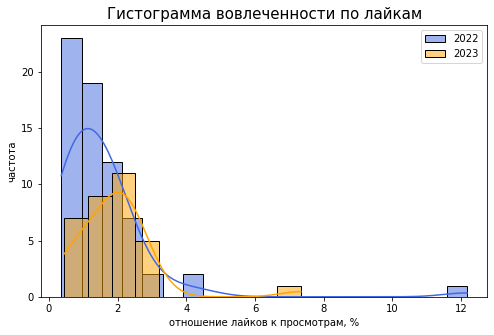

In [27]:
plt.figure(figsize=(8, 5))
sns.histplot(data = data.query('year==2022')['likes_to_views_ratio'], label = '2022', color = 'royalblue', kde = True)
sns.histplot(data = data.query('year==2023')['likes_to_views_ratio'], label = '2023', color = 'orange', kde = True)
plt.legend()
plt.xlabel('отношение лайков к просмотрам, %', size = 10)
plt.ylabel('частота', size = 10)
plt.title('Гистограмма вовлеченности по лайкам', size = 15)
plt.show()

+ В 2022 максимальное значение лайк-вовлеченности составило 12%. Медианное значение лайк-вовлеченности - 1.3% 
+ В 2023 максимальное значение лайк-вовлеченности составило 7%. Медианное значение лайк-вовлеченности - 1.9%

### Вовлеченность по комментариям

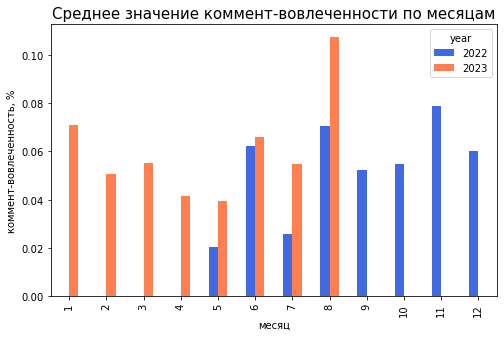

In [28]:
data['comments_to_views_ratio'] = 100*data['comments']/data['views']
comments_to_views_ratio = data.pivot_table(index = 'month', columns = 'year', values = 'comments_to_views_ratio', aggfunc = 'mean')
comments_to_views_ratio.plot(kind = 'bar', figsize = (8,5), color = ('royalblue','coral'))

plt.title('Среднее значение коммент-вовлеченности по месяцам', size = 15)
plt.xlabel('месяц', size = 10)
plt.ylabel('коммент-вовлеченность, %', size = 10)
plt.show()

In [29]:
print('Средняя вовлеченность по комментариям за 2022 год:',round(data.query('year==2022')['comments_to_views_ratio'].mean(),3),'%')
print('Средняя вовлеченность по комментариям за 2023 год:',round(data.query('year==2023')['comments_to_views_ratio'].mean(),3),'%')

Средняя вовлеченность по комментариям за 2022 год: 0.053 %
Средняя вовлеченность по комментариям за 2023 год: 0.062 %


Хорошим показателем вовлеченности по комментариям для канала о дикой природе, считается уровень в 0.1%.

В 2023 году показатель коммент-вовлеченности составил 0.062%, в 2022 показатель на 0.009 процентных пункта меньше.

Посмотрим гистограмму вовлеченности по комментариям за 2 года

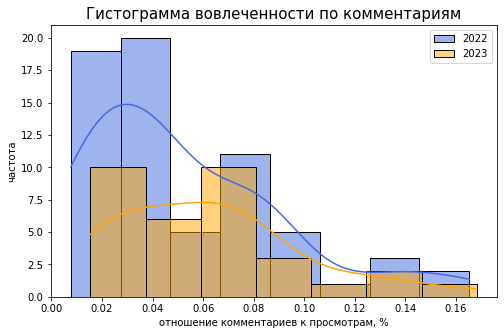

In [30]:
plt.figure(figsize=(8, 5))
sns.histplot(data = data.query('year==2022')['comments_to_views_ratio'], label = '2022', color = 'royalblue', kde=True)
sns.histplot(data = data.query('year==2023')['comments_to_views_ratio'], label = '2023', color = 'orange', kde=True)
plt.legend()
plt.xlabel('отношение комментариев к просмотрам, %', size = 10)
plt.ylabel('частота', size = 10)
plt.title('Гистограмма вовлеченности по комментариям', size = 15)
plt.show()

+ В 2022 максимальное значение коммент-вовлеченности составило 16%. Медианное значение лайк-вовлеченности - 0.042% 
+ В 2023 максимальное значение коммент-вовлеченности составило 16%. Медианное значение лайк-вовлеченности - 0.063%

### Выводы
+ В 2023 году средний показатель **лайк-вовлеченности** составил 1.94%, в 2022 показатель на 0.4 процентных пункта **меньше**.

+ В 2023 году средний показатель **коммент-вовлеченности** составил 0.062%, в 2022 показатель на 0.009 процентных пункта **меньше**.

В 2023 пресмотрели **стратегию** ведения YouTube-канала, акцент был сделан на повышение **вовлеченности** аудитории по лайкам и комментариям.

## Количественная статистика по сериям 
### Датасет `data_groupped`

Сгруппируем данные по средним серийным показателям

In [31]:
data_groupped = data.groupby('series', as_index = False)\
                        .agg({'title':'nunique', 'likes':'mean', 'views':'mean',\
                              'comments':'mean', 'days_online':'mean'}).reset_index(drop = True)
data_groupped.columns = ['series', 'number', 'likes', 'views', 'comments', 'days_online']

data_groupped.head()

,series,number,likes,views,comments,days_online
0,Alaska's Grizzly Gauntlet,1,662.00,31088.00,27.00,26.00
1,America the Wild,6,1318.33,143500.00,84.33,373.50
2,Animal ER,2,444.50,17217.50,16.50,16.00
3,Animal Fight Night,8,13025.00,2510241.75,475.00,290.50
4,Bandit Patrol,5,495.00,23021.80,21.60,329.40


`number` - число выпусков в серии

### Статистика числа выпусков

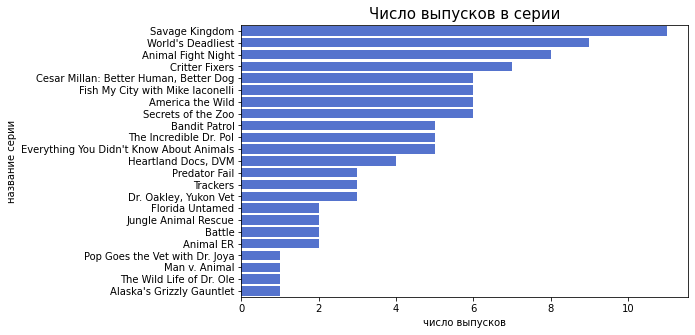

In [32]:
number_of_series = data_groupped.sort_values('number', ascending = False)

plt.figure(figsize = (8,5))
ax = sns.barplot(x = "number", y = 'series', data = number_of_series, color = 'royalblue')
plt.title('Число выпусков в серии', size = 15)
plt.xlabel('число выпусков', size = 10)
plt.ylabel('название серии', size = 10)
plt.show()

Чаще прочих на канале выходили выпуски `Savage Kingdom`, `World's Deadliest`, `Animal Fight Night`

### Статистика просмотров

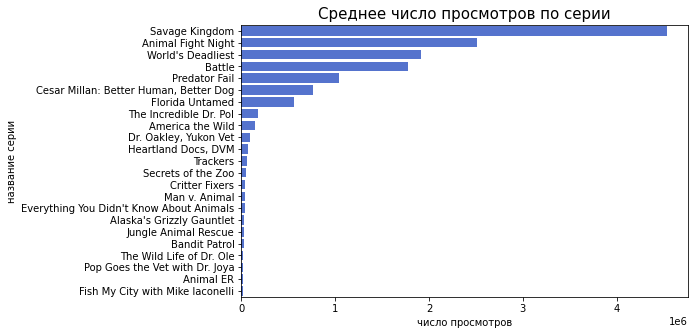

In [33]:
views_per_series = data_groupped.sort_values('views', ascending = False)

plt.figure(figsize = (8,5))
ax = sns.barplot(x = "views", y = 'series', data = views_per_series, color = 'royalblue')
plt.title('Среднее число просмотров по серии', size = 15)
plt.xlabel('число просмотров', size = 10)
plt.ylabel('название серии', size = 10)
plt.show()

По просмотрам лидируют выпуски серий `Savage Kingdom`, `Animal Fight Night` и `World's Deadliest`

### Статистика лайков

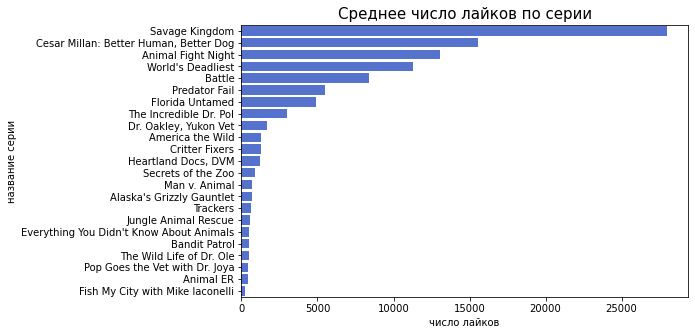

In [34]:
likes_per_series = data_groupped.sort_values('likes', ascending = False)

plt.figure(figsize = (8,5))
ax = sns.barplot(x = "likes", y = 'series', data = likes_per_series, color = 'royalblue')
plt.title('Среднее число лайков по серии', size = 15)
plt.xlabel('число лайков', size = 10)
plt.ylabel('название серии', size = 10)
plt.show()

Больше всего лайкают выпуски серий `Savage Kingdom`, `Cesar Millan: Better Human, Better Dog` и `Animal Fight Night`

### Статистика комментариев

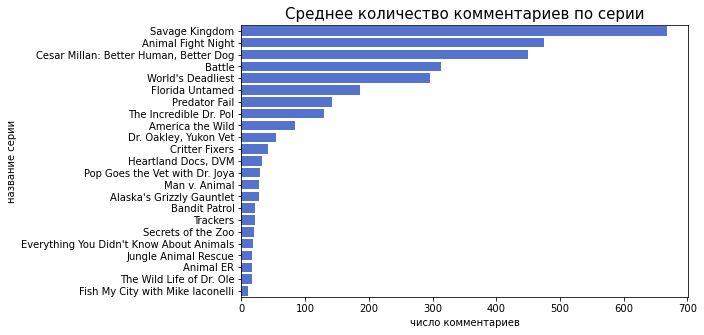

In [35]:
comments_per_series = data_groupped.sort_values(by = 'comments', ascending = False)

plt.figure(figsize = (8,5))
ax = sns.barplot(x = "comments", y = 'series', data = comments_per_series, color = 'royalblue')
plt.title('Среднее количество комментариев по серии', size = 15)
plt.xlabel('число комментариев', size = 10)
plt.ylabel('название серии', size = 10)
plt.show()

Самые комментируемые выпуски серий `Savage Kingdom`, `Animal Fight Night` и `Cesar Millan: Better Human, Better Dog`

### Статистика дней в сети

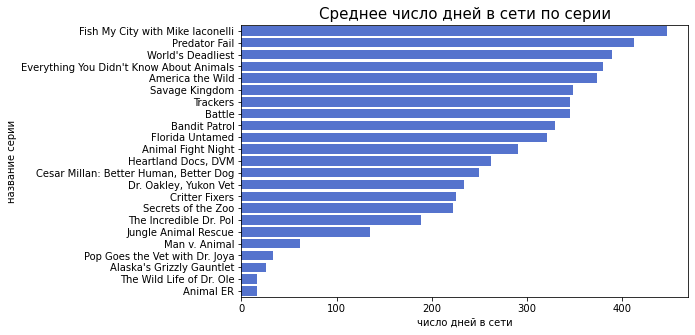

In [36]:
views_per_series = data_groupped.sort_values('days_online', ascending = False)

plt.figure(figsize = (8,5))
ax = sns.barplot(x = "days_online", y = 'series', data = views_per_series, color = 'royalblue')
plt.title('Среднее число дней в сети по серии', size = 15)
plt.xlabel('число дней в сети', size = 10)
plt.ylabel('название серии', size = 10)
plt.show()

Дольше всего в сети находятся выпуски серий `Fish My City with Mike Iaconelli`, `Predator Fail` и `World's Deadliest`

### Выводы
+ Чаще прочих на канале выходили выпуски `Savage Kingdom`, `World's Deadliest`, `Animal Fight Night`
+ По просмотрам лидируют выпуски серий `Savage Kingdom`, `Animal Fight Night` и `World's Deadliest`
+ Больше всего лайкают выпуски серий `Savage Kingdom`, `Cesar Millan: Better Human, Better Dog` и `Animal Fight Night`
+ Самые комментируемые выпуски серий `Savage Kingdom`, `Animal Fight Night` и `Cesar Millan: Better Human, Better Dog`
+ Дольше всего в сети находятся выпуски серий `Fish My City with Mike Iaconelli`, `Predator Fail` и `World's Deadliest`

## Анализ рейтинговых показателей
### Подсчет рейтинга
Добавим колонку с рейтингом в датафрейм `data`

`rating` - отображает рейтинг выпуска с учетом просмотров/лайков/коментариев

$
\text{rating = 0.5*views + 0.3*likes + 0.2*comments}
$


Коэффициенты подобраны с учетом того, что просмотры на канале играют бóльшую роль, чем лайки и комментарии

In [37]:
data['rating'] = 0.5*data['views'] + 0.3*data['likes'] + 0.2*data['comments']
data_rating = data[['title','series','views','likes','comments','created_at','rating']]

data_rating.head(3)

,title,series,views,likes,comments,created_at,rating
0,In the Operating Room: A White Bengal Tiger Emergency (Full Episode) | Animal ER,Animal ER,13824,427,18,2023-08-31,7043.70
1,The Vet Detective and the Amputee Alligator (Full Episode) | The Wild Life of Dr. Ole,The Wild Life of Dr. Ole,20340,485,16,2023-08-24,10318.70
2,"Tortoise Surgery, Chinchilla Emergency, and the Chicken (Full Episode) | Dr. K's Exotic Animal ER",Animal ER,20611,462,15,2023-08-17,10447.10


Сгруппируем данные по сериям

In [38]:
rating_per_series = data_rating.groupby('series', as_index = False).agg({'rating':'mean', 'title':'nunique', 'created_at':'max'}).reset_index(drop=True)
rating_per_series.columns=['series','rating','number','latest_date']

print('Число серий на канале:',rating_per_series.shape[0])

Число серий на канале: 23


Отберем самые высоко- и низкирейтинговые серии по 7 штук: топ-7 и лоу-7. Серий со средним рейтингом останется 9.

#### Серии с низким рейтингом

Посмотрим, какие серии попали в рейтинг лоу-7

In [39]:
low_seven_rating = rating_per_series.sort_values(by = ['rating']).reset_index(drop=True)
low_seven_rating_list = list(low_seven_rating['series'][:7])
low_seven_rating_series = low_seven_rating.query('series in @low_seven_rating_list')

low_seven_rating_series

,series,rating,number,latest_date
0,Fish My City with Mike Iaconelli,5841.83,6,2022-07-07
1,Animal ER,8745.40,2,2023-08-31
2,Pop Goes the Vet with Dr. Joya,8766.60,1,2023-08-07
3,The Wild Life of Dr. Ole,10318.70,1,2023-08-24
4,Bandit Patrol,11663.72,5,2022-10-30
5,Jungle Animal Rescue,13948.85,2,2023-05-15
6,Alaska's Grizzly Gauntlet,15748.00,1,2023-08-14


+ Самые низкорейтинговые (лоу-7): `Fish My City with Mike Iaconelli`, `Animal ER`, `Pop Goes the Vet with Dr. Joya`, `The Wild Life of Dr. Ole`, `Bandit Patrol`, `Jungle Animal Rescue` и `Alaska's Grizzly Gauntlet`.
+ Серии `Animal ER`, `Pop Goes the Vet with Dr. Joya`, `Alaska's Grizzly Gauntlet` новые для канала: начали выходить в августе. Несмотря на то, что они на канале находятся около месяца, рейтинг у серий низкий (рейтинговые видео за первую неделю набирают много просмотров).

Посмотрим на динамику выхода серий с низким рейтингом 

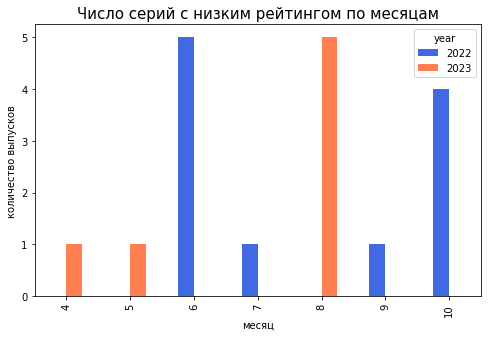

In [40]:
low_seven_rating_series_pivot = data.query('series in @low_seven_rating_list')\
                             .pivot_table(index = 'month',columns = 'year', values = 'title', aggfunc = 'nunique')

low_seven_rating_series_pivot.plot(kind = 'bar', figsize = (8,5), color = ('royalblue','coral'))
plt.title('Число серий с низким рейтингом по месяцам', size = 15)
plt.xlabel('месяц', size = 10)
plt.ylabel('количество выпусков', size = 10)
plt.show()

+ В 2022 серии с низким рейтингом чаще выходили в июне и октябре. 
+ В 2023 серии с низким рейтингом чаще выходили в августе.

In [41]:
low_seven_rating_stat = low_seven_rating_series_pivot.reset_index()  
low_seven_rating_stat.columns = ['month','2022','2023']

print ('Среднее число серий с низким рейтингом за месяц в 2022 году:', round(low_seven_rating_stat['2022'].sum()/8,1))
print ('Среднее число серий с низким рейтингом за месяц в 2023 году:', round(low_seven_rating_stat['2023'].sum()/8,1))

Среднее число серий с низким рейтингом за месяц в 2022 году: 1.4
Среднее число серий с низким рейтингом за месяц в 2023 году: 0.9


В 2022 году в среднем выходило 1.4  серии с низким рейтингом в месяц, в 2023 в 1.5 раза меньше

### Серии с высоким рейтингом

Посмотрим, какие серии попали в рейтинг топ-7

In [42]:
top_seven_rating = rating_per_series.sort_values(by = ['rating'], ascending = False).reset_index(drop=True)
top_seven_rating_list = list(top_seven_rating['series'][:7])
top_seven_rating_series = top_seven_rating.query('series in @top_seven_rating_list')

top_seven_rating_series

,series,rating,number,latest_date
0,Savage Kingdom,2274039.02,11,2023-05-01
1,Animal Fight Night,1259123.38,8,2023-07-03
2,World's Deadliest,960315.29,9,2023-06-19
3,Battle,888490.10,2,2022-10-13
4,Predator Fail,523853.37,3,2022-08-04
5,"Cesar Millan: Better Human, Better Dog",384775.33,6,2023-05-29
6,Florida Untamed,280401.70,2,2022-10-27


+ Cамые рейтинговые (топ-7): `Savage Kingdom`, `Animal Fight Night`, `World's Deadliest`,`Battle`, `Predator Fail`, `Cesar Millan: Better Human, Better Dog` и `Florida Untamed`
+ Серии `Battle`, `Predator Fail` и  `Florida Untamed` не выходили более года, их можно продолжить снимать далее, так как у них высокие рейтинги.

Посмотрим динамику выхода серий с высоким рейтингом

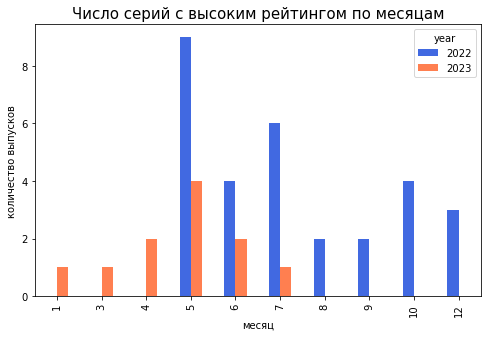

In [43]:
top_seven_rating_series_pivot = data.query('series in @top_seven_rating_list')\
                             .pivot_table(index = 'month',columns = 'year', values = 'title', aggfunc = 'nunique')                                                                                          

top_seven_rating_series_pivot.plot(kind = 'bar', figsize = (8,5), color = ('royalblue','coral'))
plt.title('Число серий с высоким рейтингом по месяцам', size = 15)
plt.xlabel('месяц', size = 10)
plt.ylabel('количество выпусков', size = 10)
plt.show()

+ В 2022 году наблюдается уменьшение количества выпускаемых серий с высоким рейтингом. В ноябре 2022 не вышло ни одной рейтинговой серии.
+ В начале 2023 году видна положительная динамика: в месяц выходит все больше серий с высоким рейтингом. Начиная с июня, число рейтинговых серий уменьшается. В феврале и августе 2023 не вышло ни одной рейтинговой серии. 

In [44]:
top_seven_rating_stat = top_seven_rating_series_pivot.reset_index()  
top_seven_rating_stat.columns = ['month','2022','2023']

print ('Среднее число рейтинговых выпусков за месяц в 2022 году:', round(top_seven_rating_stat['2022'].sum()/8,1))
print ('Среднее число рейтинговых выпусков за месяц в 2023 году:', round(top_seven_rating_stat['2023'].sum()/8,1))

Среднее число рейтинговых выпусков за месяц в 2022 году: 3.8
Среднее число рейтинговых выпусков за месяц в 2023 году: 1.4


В 2022 году в среднем выходило 3.8 серии с высоким рейтингом в месяц, в 2022 показатели в 2.7 раза ниже.

### Выводы
+ Самые низкорейтинговые (лоу-7): `Fish My City with Mike Iaconelli`, `Animal ER`, `Pop Goes the Vet with Dr. Joya`, `The Wild Life of Dr. Ole`, `Bandit Patrol`, `Jungle Animal Rescue` и `Alaska's Grizzly Gauntlet`. В 2022 году в среднем выходило 1.4 серии с **низким рейтингом** в месяц, в 2023 показатели в 1.5 раза **ниже**.
+ Серии `Animal ER`, `Pop Goes the Vet with Dr. Joya`, `Alaska's Grizzly Gauntlet` новые для канала: начали выходить в августе. Несмотря на то, что они на канале находятся около месяца, рейтинг у серий низкий (рейтинговые видео за первую неделю набирают много просмотров).




+ Cамые рейтинговые (топ-7): `Savage Kingdom`, `Animal Fight Night`, `World's Deadliest`,`Battle`, `Predator Fail`, `Cesar Millan: Better Human, Better Dog` и `Florida Untamed`. В 2022 году в среднем выходило 3.8 серии с **высоким рейтингом** в месяц, в 2022 показатели в 2.7 раза **ниже**.
+ Серии `Battle`, `Predator Fail` и  `Florida Untamed` не выходили более года, их можно продолжить снимать далее, так как у них высокие рейтинги.

<a id='section4'></a>
# Проверка гипотез 

## Проверка гипотезы №1
+ **H1**: Пользовательская активность в 2023 году ниже, т.к. доля рейтинговых выпусков в 2022 была выше.

Объединим таблицы с суммарным числом видео и числом топ-выпусков за месяц 

In [45]:
merged_stat = videos_per_month_upd.merge(top_seven_rating_stat, how = 'left', on = 'month')
merged_stat.columns = ['month','2022_sum','2023_sum','2022_top','2023_top']
merged_stat = merged_stat.fillna(0)

merged_stat

,month,2022_sum,2023_sum,2022_top,2023_top
0,1,0.00,5.00,0.00,1.00
1,2,0.00,3.00,0.00,0.00
2,3,0.00,4.00,0.00,1.00
3,4,0.00,4.00,0.00,2.00
4,5,9.00,5.00,9.00,4.00
5,6,9.00,4.00,4.00,2.00
6,7,7.00,3.00,6.00,1.00
7,8,8.00,5.00,2.00,0.00
8,9,10.00,0.00,2.00,0.00
9,10,9.00,0.00,4.00,0.00


In [46]:
print('Число рейтинговых выпусков за 2022 год:',round(merged_stat['2022_top'].sum()))
print('Доля рейтинговых выпусков за 2022 год:',round(merged_stat['2022_top'].sum()/merged_stat['2022_sum'].sum(),2))
print('Число рейтинговых выпусков за 2023 год:',round(merged_stat['2023_top'].sum()))
print('Доля рейтинговых выпусков за 2023 год:',round(merged_stat['2023_top'].sum()/merged_stat['2023_sum'].sum(),2))

Число рейтинговых выпусков за 2022 год: 30
Доля рейтинговых выпусков за 2022 год: 0.45
Число рейтинговых выпусков за 2023 год: 11
Доля рейтинговых выпусков за 2023 год: 0.33


+ В 2022 году рейтинговые выпуски выходили в 2.7 раза чаще, чем в 2023
+ В 2022 году доля рейтинговых выпусков составила 0.45, в 2023 показатель в 1.36 раза меньше.

**Гипотеза №1 подтверждена**

## Проверка гипотезы №2

+ **H2**: Пользовательская активность в 2023 году ниже, т.к. выпуски 2022 года находились в сети дольше.

Построим графики числа лайков/просмотров/комментариев по дням в сети 

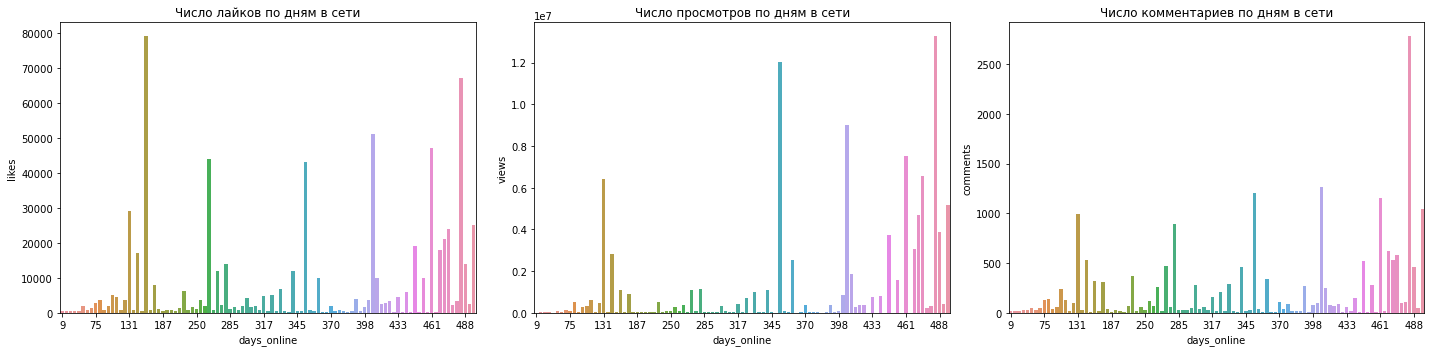

In [47]:
fig, axs = plt.subplots(1, 3, figsize=(20, 5))

sns.barplot(x = "days_online", y = "likes", data = data, ax = axs[0])
axs[0].set_title('Число лайков по дням в сети')

sns.barplot(x = "days_online", y = "views", data = data, ax = axs[1])
axs[1].set_title('Число просмотров по дням в сети')

sns.barplot(x = "days_online", y = "comments", data = data, ax = axs[2])
axs[2].set_title('Число комментариев по дням в сети')

axs[0].set_xticks(range(0, len(data), 8))  
axs[1].set_xticks(range(0, len(data), 8))  
axs[2].set_xticks(range(0, len(data), 8))

plt.tight_layout()
plt.show()

Популярные видео на канале выходят с периодичностью три-четыре месяца. Провала по статистике не наблюдается.

Посмотрим на общую корреляцию данных

In [48]:
data[['likes', 'views', 'comments', 'days_online']].corr()

,likes,views,comments,days_online
likes,1.00,0.78,0.80,0.17
views,0.78,1.00,0.92,0.29
comments,0.80,0.92,1.00,0.25
days_online,0.17,0.29,0.25,1.00


**Выводы**
+ **Высокая** зависимость между **просмотрами и комментариями** (0.92)
+ **Высокая** зависимость между **лайками и комментариями** (0.80)
+ **Высокая** зависимость между **лайками и просмотрами** (0.78)
+ **Низкая** зависимость между **длительностью нахождения в сети и лайками/просмотрами/комментариями** (<0.3)

Низкая активность пользователей в 2023 году не связана с тем, что выпуски предыдущего года находились в сети дольше.

**Гипотеза №2 не подтверждена**

<a id='section5'></a>
# Общие выводы 
1. В 2022 году в среднем выходило по 8 **видео в месяц**, за 2023 год показатели **в 2 раза ниже**.


2. В 2022 году среднее **число просмотров под видео** составило 1.33 млн., за 2023 год показатели **в 2.9 раза ниже**.


3. В 2022 году среднее **число лайков под видео** составило 8014, в 2023 показатели **в 1.5 раза ниже**.


4. В 2022 году среднее **число комментариев под видео** составило 247, за 2023 год показатели **в 2 раза ниже**.


5. В 2023 году средний показатель **лайк-вовлеченности** составил 1.94%, в 2022 показатель на 0.4 процентных пункта **меньше**.



6. В 2023 году средний показатель **коммент-вовлеченности** составил 0.062%, в 2022 показатель на 0.009 процентных пункта **меньше**.


7. В 2022 году в среднем выходило 1.4 серии с **низким рейтингом** в месяц, в 2023 в 1.5 раза **меньше**.


8. В 2022 году в среднем выходило 3.8 серии с **высоким рейтингом** в месяц, в 2022 показатели в 2.7 раза **ниже**.


9. В начале 2023 году видна **положительная динамика**: в месяц выходило все **больше** серий с высоким рейтингом. Начиная с июня, число рейтинговых серий **уменьшалось**. В августе не вышло **ни одной** серии с высоким рейтингом.


10. Самые низкорейтинговые (лоу-7): `Fish My City with Mike Iaconelli`, `Animal ER`, `Pop Goes the Vet with Dr. Joya`, `The Wild Life of Dr. Ole`, `Bandit Patrol`, `Jungle Animal Rescue` и `Alaska's Grizzly Gauntlet`. В августе 2023 вышло аж 5 выпусков из этих серий.


11. Cамые рейтинговые (топ-7): `Savage Kingdom`, `Animal Fight Night`, `World's Deadliest`,`Battle`, `Predator Fail`, `Cesar Millan: Better Human, Better Dog` и `Florida Untamed`. Некоторые из них продолжают выходить на канале, но реже, чем в 2022.


12. Гипотеза №1 **подтверждена**. Доля рейтинговых выпусков в 2023 году составила 0.33, что в 1.36 раза **меньше**, чем в 2022. Поэтому, в 2023 пользовательская активность ниже.


13. Гипотеза №2 **не подтверждена**. Низкая активность пользователей в 2023 году **не связана** с тем, что выпуски предыдущего года находились в сети **дольше**.


В 2023 Nat Geo WILD пресмотрели **стратегию** ведения YouTube-канала: акцент был сделан на повышение **вовлеченности** аудитории по лайкам и комментариям. В 2023 выпуски стали выходить реже, вовлеченность аудитории увеличилась (доля лайков и комментариев от просмотров). Появились новые серии, но многие из них не стали рейтинговыми, в следствие чего средние показатели канала уменьшились.

Можно выделить 2 рекомендации для улучшения показателей канала Nat Geo WILD.

<a id='section6'></a>
# Рекомендации 

1. Серии `Animal ER`, `Pop Goes the Vet with Dr. Joya`, `Alaska's Grizzly Gauntlet` новые для канала, и они попали в топ-7 низкорейтинговых за все время, их можно больше не снимать.


2. Серии `Battle`, `Predator Fail` и  `Florida Untamed` не выходили более года, их можно продолжить снимать далее, так как у них высокие рейтинги.